In [34]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import requests
import seaborn as sn
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
# client_id and client_secret obtained from Spotify developer account
client_id = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx" # replace with your clien_id and client_secret
client_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
#spotify object to access API
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
name = "{BILLIE EILISH}" #chosen artist
result = sp.search(name) #search query
#result['tracks']['items'][0]['artists']
result['tracks']['items'][2]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6qqNVTkY8uBg9cP3Jd7DAH'},
  'href': 'https://api.spotify.com/v1/artists/6qqNVTkY8uBg9cP3Jd7DAH',
  'id': '6qqNVTkY8uBg9cP3Jd7DAH',
  'name': 'Billie Eilish',
  'type': 'artist',
  'uri': 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'}]

In [3]:
# Extracting the albums
#Extract Artist's uri
artist_uri = result['tracks']['items'][2]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri,country='US')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
print(album_names)
print(album_uris)
#Keep names and uris in same order to keep track of duplicate albums


['Happier Than Ever', 'Happier Than Ever', 'WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?', 'Guitar Songs', 'Happier Than Ever (Edit)', 'Happier Than Ever (Edit)', 'ilomilo (Live From The Film - Billie Eilish: The World’s A Little Blurry)', 'Lo Vas A Olvidar (with ROSALÍA)', 'Therefore I Am', 'my future', 'No Time To Die', 'everything i wanted', 'bad guy (with Justin Bieber)', 'WHEN I WAS OLDER (Music Inspired By The Film ROMA)', 'come out and play', 'lovely (with Khalid)', 'bitches broken hearts', 'MyBoi (TroyBoi Remix)', 'COPYCAT (Sofi Tukker Remix)', 'dont smile at me']
['spotify:album:0JGOiO34nwfUdDrD612dOp', 'spotify:album:5tzRuO6GP7WRvP3rEOPAO9', 'spotify:album:0S0KGZnfBGSIssfF54WSJh', 'spotify:album:1YPWxMpQEC8kcOuefgXbhj', 'spotify:album:2kzPJWrTjVKEYWWhowXLnz', 'spotify:album:5lDUpb6zBr4xBh9AGUXYtQ', 'spotify:album:2AyexmwyUy1nZfBadyewL7', 'spotify:album:4E8puNI8tw7cXz6YJkwMew', 'spotify:album:5G58VVE9ub1KE01Mvbd8XM', 'spotify:album:3oxhQpF3Twbkl18oQYfnh5', 'spotify:album:5sXSHscDj

In [4]:
# Extracting songs from each album
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [5]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Happier Than Ever songs has been added to spotify_albums dictionary
Album Happier Than Ever songs has been added to spotify_albums dictionary
Album WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? songs has been added to spotify_albums dictionary
Album Guitar Songs songs has been added to spotify_albums dictionary
Album Happier Than Ever (Edit) songs has been added to spotify_albums dictionary
Album Happier Than Ever (Edit) songs has been added to spotify_albums dictionary
Album ilomilo (Live From The Film - Billie Eilish: The World’s A Little Blurry) songs has been added to spotify_albums dictionary
Album Lo Vas A Olvidar (with ROSALÍA) songs has been added to spotify_albums dictionary
Album Therefore I Am songs has been added to spotify_albums dictionary
Album my future songs has been added to spotify_albums dictionary
Album No Time To Die songs has been added to spotify_albums dictionary
Album everything i wanted songs has been added to spotify_albums dictionary
Album bad guy (with Ju

In [6]:
spotify_albums

{'spotify:album:0JGOiO34nwfUdDrD612dOp': {'album': ['Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever',
   'Happier Than Ever'],
  'track_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
  'id': ['4HOryCnbme0zBnF8LWij3f',
   '7bcy34fBT2ap1L4bfPsl9q',
   '2KnuaZYoGzDoHiBTNYOTXG',
   '3YUMWmx8EJq0DurfuIwoGh',
   '4t2OeILB07eMGTXSUbMPEu',
   '0FfqyjhB6Kspvit1oOo7ax',
   '4191RXFPa7Ge9XkA4cWlna',
   '5XsAal7ZcWg1I5T4NcRjkv',
   '4T2zre0jqstNJ5Gt0WG9lz',
   '5uSG6fUPRaehaV820zcpsK',
   '5jhBwnqzNNrENXnYrAdoCe',
   '042Sl6Mn83JHyLEqdK7uI0',
   '38GBNKZUhfBkk3oNlWzRYd',
   '20R4HfKloPKgXDqU7UKk3x',
   '4RVwu0g32PAqgUiJoXsdF8',
   '4ak9GGe6afmi2HbxEjvhIC'],
  'name': ['Getting 

In [7]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [8]:
# Loop through albums extracting the audio features
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 13.401570081710815 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 17.98797059059143 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 21.140076398849487 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 25.766356945037842 seconds


In [9]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

72

In [10]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Happier Than Ever,1,4HOryCnbme0zBnF8LWij3f,Getting Older,spotify:track:4HOryCnbme0zBnF8LWij3f,0.9740,0.599,0.128,0.121000,0.1150,-17.261,0.1090,159.679,0.3670,73
1,Happier Than Ever,2,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,spotify:track:7bcy34fBT2ap1L4bfPsl9q,0.6120,0.849,0.480,0.269000,0.2950,-5.835,0.2260,142.021,0.6770,74
2,Happier Than Ever,3,2KnuaZYoGzDoHiBTNYOTXG,Billie Bossa Nova,spotify:track:2KnuaZYoGzDoHiBTNYOTXG,0.2220,0.895,0.389,0.034600,0.1050,-11.036,0.1100,110.023,0.5490,75
3,Happier Than Ever,4,3YUMWmx8EJq0DurfuIwoGh,my future,spotify:track:3YUMWmx8EJq0DurfuIwoGh,0.8140,0.456,0.285,0.143000,0.3070,-10.755,0.0979,104.890,0.0809,70
4,Happier Than Ever,5,4t2OeILB07eMGTXSUbMPEu,Oxytocin,spotify:track:4t2OeILB07eMGTXSUbMPEu,0.0904,0.757,0.598,0.551000,0.1500,-7.777,0.0580,124.951,0.1800,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,dont smile at me,5,3WxmlTZ85sCYFnuIXmUAEe,party favor,spotify:track:3WxmlTZ85sCYFnuIXmUAEe,0.8820,0.826,0.188,0.000003,0.1030,-12.181,0.0883,130.022,0.2050,68
68,dont smile at me,6,1ni8ZTAY1GHXEFOGHl7fdg,bellyache,spotify:track:1ni8ZTAY1GHXEFOGHl7fdg,0.4600,0.695,0.573,0.073400,0.4820,-8.597,0.1060,99.939,0.4080,68
69,dont smile at me,7,7hDVYcQq6MxkdJGweuCtl9,ocean eyes,spotify:track:7hDVYcQq6MxkdJGweuCtl9,0.8160,0.511,0.363,0.031700,0.0840,-7.650,0.0410,144.892,0.1690,80
70,dont smile at me,8,1WsEgieHsWWndAzLkmV105,hostage,spotify:track:1WsEgieHsWWndAzLkmV105,0.8680,0.427,0.123,0.000031,0.0732,-15.228,0.0497,129.565,0.0394,74


In [11]:
df.nunique()

album               18
track_number        16
id                  72
name                53
uri                 72
acousticness        67
danceability        68
energy              65
instrumentalness    64
liveness            61
loudness            70
speechiness         69
tempo               71
valence             71
popularity          34
dtype: int64

In [12]:
df['name'].unique()

array(['Getting Older', "I Didn't Change My Number", 'Billie Bossa Nova',
       'my future', 'Oxytocin', 'GOLDWING', 'Lost Cause',
       "Halley's Comet", 'Not My Responsibility', 'OverHeated',
       'Everybody Dies', 'Your Power', 'NDA', 'Therefore I Am',
       'Happier Than Ever', 'Male Fantasy', '!!!!!!!', 'bad guy', 'xanny',
       'you should see me in a crown', 'all the good girls go to hell',
       'wish you were gay', "when the party's over", '8',
       'my strange addiction', 'bury a friend', 'ilomilo',
       'listen before i go', 'i love you', 'goodbye', 'TV', 'The 30th',
       'Happier Than Ever - Edit',
       'ilomilo - Live From The Film - Billie Eilish: The World’s A Little Blurry',
       'Lo Vas A Olvidar (with ROSALÍA)', 'No Time To Die',
       'everything i wanted', 'bad guy (with Justin Bieber)',
       'WHEN I WAS OLDER - Music Inspired By The Film ROMA',
       'come out and play', 'lovely (with Khalid)',
       'bitches broken hearts', 'MyBoi - TroyBoi R

In [14]:
# Getting song lyrics 
#function to scrape lyrics from genius
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    html = BeautifulSoup(page.text, 'html.parser')
    #print(html)
    #with open("randomfile.html", "w") as external_file:
    #    add_text = html
    #    add_text = add_text.encode('utf-8').decode('ascii', 'ignore')
    #    print(add_text, file=external_file)
    #    external_file.close()

    lyrics1 = html.find("div", class_="lyrics")
    #lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn") 
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")
    if lyrics1:
        lyrics = lyrics1.get_text()
    elif lyrics2:
        lyrics = lyrics2.get_text()
    elif lyrics1 == lyrics2 == None:
        lyrics = None
    return lyrics
artist_name='Billie Eilish'
#function to attach lyrics onto data frame
#artist_name should be inserted as a string
def lyrics_onto_frame(df1, artist_name):
    for i,x in enumerate(df1['name']):
        test = scrape_lyrics(artist_name, x)
        df1.loc[i, 'lyrics'] = test
    return df

In [15]:
df=lyrics_onto_frame(df, artist_name)

In [16]:
df.head(n=3)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,lyrics
0,Happier Than Ever,1,4HOryCnbme0zBnF8LWij3f,Getting Older,spotify:track:4HOryCnbme0zBnF8LWij3f,0.974,0.599,0.128,0.1210,0.115,-17.261,0.109,159.679,0.367,73,"[Verse 1]I'm gettin' older, I think I'm agin' ..."
1,Happier Than Ever,2,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,spotify:track:7bcy34fBT2ap1L4bfPsl9q,0.612,0.849,0.480,0.2690,0.295,-5.835,0.226,142.021,0.677,74,None
2,Happier Than Ever,3,2KnuaZYoGzDoHiBTNYOTXG,Billie Bossa Nova,spotify:track:2KnuaZYoGzDoHiBTNYOTXG,0.222,0.895,0.389,0.0346,0.105,-11.036,0.110,110.023,0.549,75,"[Intro]Mm-mm-mm, mm-mmDa-da-da-da[Verse 1]Love..."


In [17]:
tf_df=pd.DataFrame()
tf_df['Name']=df['name']
tf_df['acousticness']=df['acousticness']
tf_df['danceability']=df['danceability']
tf_df['energy']=df['energy']
tf_df['instrumentalness']=df['instrumentalness']
tf_df['liveness']=df['liveness']
tf_df['loudness']=df['loudness']
tf_df['speechiness']=df['speechiness']
tf_df['tempo']=df['tempo']
tf_df['valence']=df['valence']

In [18]:
corr_matrix = tf_df.corr()
print(corr_matrix)

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.477932 -0.724947         -0.193882   
danceability         -0.477932      1.000000  0.433925          0.191188   
energy               -0.724947      0.433925  1.000000          0.088851   
instrumentalness     -0.193882      0.191188  0.088851          1.000000   
liveness             -0.034404     -0.150210  0.181685         -0.130415   
loudness             -0.613534      0.492839  0.730331         -0.147443   
speechiness          -0.215394      0.397156  0.097060         -0.157275   
tempo                -0.153510      0.250595  0.312309          0.056234   
valence              -0.489639      0.672864  0.401635         -0.022577   

                  liveness  loudness  speechiness     tempo   valence  
acousticness     -0.034404 -0.613534    -0.215394 -0.153510 -0.489639  
danceability     -0.150210  0.492839     0.397156  0.250595  0.672864  
energy            0.181

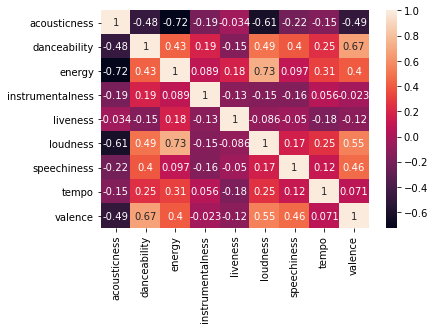

In [19]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

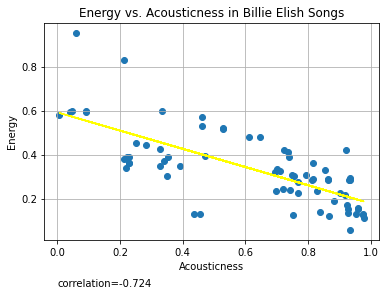

In [20]:
# creates a graph showing the relation between the energy of a song and its acousticness
plt.figure(2) # make a new figure

# create a scatterplot, acousticness on the x axis, energy on y
plt.scatter(x=tf_df['acousticness'], y=tf_df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Energy vs. Acousticness in Billie Elish Songs')
plt.grid(axis='both')

# calculate the correlation between the variables, 
# for these variables it is -0.68, which indicates 
# a fairly strong negative correlation (which means 
# when one variable's value goes up, the other one's 
# value tends to go down)
ae_correlation = tf_df[['energy', 'acousticness']].corr()
corr = str(ae_correlation['acousticness']['energy'])[:6]
plt.text(0,-0.2,"correlation=" + corr)

# calculate the line of best fit, plot it by calculating b and m to use as y=mx+b
ae_m, ae_b = np.polyfit(tf_df['acousticness'], tf_df['energy'], 1)
plt.plot(tf_df['acousticness'], ae_m*tf_df['acousticness']+ae_b,color='#ffff00')
plt.show()
plt.close()

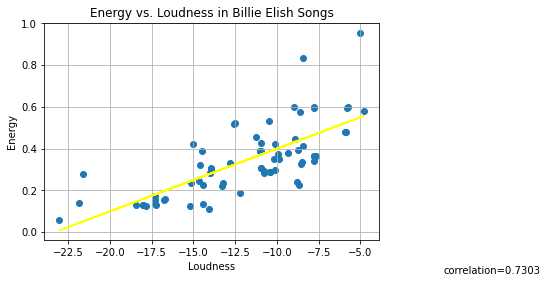

In [21]:
# creates a graph showing the relation between the energy of a song and its acousticness
plt.figure(2) # make a new figure

# create a scatterplot, acousticness on the x axis, energy on y
plt.scatter(x=tf_df['loudness'], y=tf_df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Energy vs. Loudness in Billie Elish Songs')
plt.grid(axis='both')

# calculate the correlation between the variables, 
# for these variables it is -0.68, which indicates 
# a fairly strong negative correlation (which means 
# when one variable's value goes up, the other one's 
# value tends to go down)
ae_correlation = tf_df[['energy', 'loudness']].corr()
corr = str(ae_correlation['loudness']['energy'])[:6]
plt.text(0,-0.2,"correlation=" + corr)

# calculate the line of best fit, plot it by calculating b and m to use as y=mx+b
ae_m, ae_b = np.polyfit(tf_df['loudness'], tf_df['energy'], 1)
plt.plot(tf_df['loudness'], ae_m*tf_df['loudness']+ae_b,color='#ffff00')
plt.show()
plt.close()

In [22]:
# Let's check the 10 most popular Billie Elish songs
df.sort_values(by='popularity', ascending=False).head(10)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,lyrics
59,lovely (with Khalid),1,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),spotify:track:0u2P5u6lvoDfwTYjAADbn4,0.9340,0.351,0.296,0.000000,0.0950,-10.109,0.0333,115.284,0.120,88,None
14,Happier Than Ever,15,4RVwu0g32PAqgUiJoXsdF8,Happier Than Ever,spotify:track:4RVwu0g32PAqgUiJoXsdF8,0.7670,0.332,0.225,0.003490,0.1280,-8.697,0.0348,81.055,0.297,88,[Chorus]When I'm away from youI'm happier than...
55,everything i wanted,1,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,spotify:track:3ZCTVFBt2Brf31RLEnCkWJ,0.9020,0.704,0.225,0.657000,0.1060,-14.454,0.0994,120.006,0.243,85,[Verse 1]I had a dreamI got everything I wante...
46,Guitar Songs,1,3GYlZ7tbxLOxe6ewMNVTkw,TV,spotify:track:3GYlZ7tbxLOxe6ewMNVTkw,0.8300,0.412,0.236,0.006530,0.1470,-15.159,0.0379,140.214,0.119,85,[Verse 1]I don't wanna talk right nowI just wa...
38,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",7,43zdsphuZLzwA9k4DJhU0I,when the party's over,spotify:track:43zdsphuZLzwA9k4DJhU0I,0.9780,0.367,0.111,0.000040,0.0897,-14.084,0.0972,82.642,0.198,83,None
33,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,2Fxmhks0bxGSBdJ92vM42m,bad guy,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.3280,0.701,0.425,0.130000,0.1000,-10.965,0.3750,135.128,0.562,83,"[Verse 1]White shirt now red, my bloody noseSl..."
48,Happier Than Ever (Edit),1,32BeYxKPrig1LefHsC0Xuo,Happier Than Ever - Edit,spotify:track:32BeYxKPrig1LefHsC0Xuo,0.0468,0.334,0.599,0.000392,0.2050,-5.742,0.0365,161.740,0.127,82,None
47,Guitar Songs,2,5SHpuW2qjkQtFRpE6P9Nks,The 30th,spotify:track:5SHpuW2qjkQtFRpE6P9Nks,0.9290,0.387,0.135,0.000000,0.0948,-14.398,0.0510,82.987,0.210,81,"[Verse 1]Sometimes, you look the sameJust like..."
69,dont smile at me,7,7hDVYcQq6MxkdJGweuCtl9,ocean eyes,spotify:track:7hDVYcQq6MxkdJGweuCtl9,0.8160,0.511,0.363,0.031700,0.0840,-7.650,0.0410,144.892,0.169,80,[Verse 1]I've been watchin' you for some timeC...
44,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",13,6CcJMwBtXByIz4zQLzFkKc,i love you,spotify:track:6CcJMwBtXByIz4zQLzFkKc,0.9520,0.421,0.131,0.004530,0.1090,-18.435,0.0382,137.446,0.120,80,[Verse 1]It's not trueTell me I’ve been lied t...


In [23]:
lyrics_df=pd.DataFrame()
lyrics_df['name']=df['name']
lyrics_df['lyrics']=df['lyrics']

In [24]:
lyrics_df.head()

,name,lyrics
0,Getting Older,"[Verse 1]I'm gettin' older, I think I'm agin' ..."
1,I Didn't Change My Number,None
2,Billie Bossa Nova,"[Intro]Mm-mm-mm, mm-mmDa-da-da-da[Verse 1]Love..."
3,my future,[Verse 1]I can't seem to focusAnd you don't se...
4,Oxytocin,[Verse 1]Can't take it back once it's been set...


In [25]:
# We can see that some lyrics weren't extracted
lyrics_df.nunique()

name      53
lyrics    41
dtype: int64

In [26]:
# Checking the datatypes
lyrics_df.dtypes

name      object
lyrics    object
dtype: object

In [27]:
#  Conversting lyrics to string data type
lyrics_df['lyrics']=lyrics_df['lyrics'].astype('str')

In [28]:
# removing all the songs without lyrics
new_lyrics=lyrics_df[lyrics_df.lyrics != 'None']

In [29]:
# Using regular expression we remove the newline '\n' characters from the lyrics. We also convert all the words to lowercase.
new_lyrics['cleaned_lyrics'] = new_lyrics['lyrics'].map(lambda x: re.sub(r'\n', ' ', x)).str.lower()
new_lyrics.head()

<ipython-input-29-7f0397f008ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics'] = new_lyrics['lyrics'].map(lambda x: re.sub(r'\n', ' ', x)).str.lower()


,name,lyrics,cleaned_lyrics
0,Getting Older,"[Verse 1]I'm gettin' older, I think I'm agin' ...","[verse 1]i'm gettin' older, i think i'm agin' ..."
2,Billie Bossa Nova,"[Intro]Mm-mm-mm, mm-mmDa-da-da-da[Verse 1]Love...","[intro]mm-mm-mm, mm-mmda-da-da-da[verse 1]love..."
3,my future,[Verse 1]I can't seem to focusAnd you don't se...,[verse 1]i can't seem to focusand you don't se...
4,Oxytocin,[Verse 1]Can't take it back once it's been set...,[verse 1]can't take it back once it's been set...
5,GOLDWING,"[Intro]""He hath come to the bosom of his belov...","[intro]""he hath come to the bosom of his belov..."


In [31]:
# Removing texts in []
new_lyrics['cleaned_lyrics']=new_lyrics['cleaned_lyrics'].map(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
#Removing Punctuations
new_lyrics['cleaned_lyrics']= new_lyrics['cleaned_lyrics'].str.replace('[^\w\s]','')

<ipython-input-31-6efe127f490f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics']=new_lyrics['cleaned_lyrics'].map(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
<ipython-input-31-6efe127f490f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_lyrics['cleaned_lyrics']= new_lyrics['cleaned_lyrics'].str.replace('[^\w\s]','')
<ipython-input-31-6efe127f490f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['cleaned_lyrics']

In [32]:
# Tokenize the lyrics
def lyrics_tokens(x):
    return word_tokenize(x)
new_lyrics['tokenized'] = new_lyrics['cleaned_lyrics'].map(lambda x: lyrics_tokens(x))
new_lyrics.head()

<ipython-input-32-754fa2d3cab0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['tokenized'] = new_lyrics['cleaned_lyrics'].map(lambda x: lyrics_tokens(x))


,name,lyrics,cleaned_lyrics,tokenized
0,Getting Older,"[Verse 1]I'm gettin' older, I think I'm agin' ...",im gettin older i think im agin welli wish som...,"[im, gettin, older, i, think, im, agin, welli,..."
2,Billie Bossa Nova,"[Intro]Mm-mm-mm, mm-mmDa-da-da-da[Verse 1]Love...",mmmmmm mmmmdadadadalove when it comes without ...,"[mmmmmm, mmmmdadadadalove, when, it, comes, wi..."
3,my future,[Verse 1]I can't seem to focusAnd you don't se...,i cant seem to focusand you dont seem to notic...,"[i, cant, seem, to, focusand, you, dont, seem,..."
4,Oxytocin,[Verse 1]Can't take it back once it's been set...,cant take it back once its been set in motiony...,"[cant, take, it, back, once, its, been, set, i..."
5,GOLDWING,"[Intro]""He hath come to the bosom of his belov...",he hath come to the bosom of his belovedsmilin...,"[he, hath, come, to, the, bosom, of, his, belo..."


In [35]:
# Remove stopwords
stop = stopwords.words('english')

def remove_stopwords(text):
    t = [token for token in text if token not in stop]
    text = ' '.join(t)    
    return text

In [38]:
new_lyrics['stopword_removed']=new_lyrics['tokenized'].apply(remove_stopwords)

<ipython-input-38-12a2f7974279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['stopword_removed']=new_lyrics['tokenized'].apply(remove_stopwords)


In [39]:
new_lyrics.tail()

,name,lyrics,cleaned_lyrics,tokenized,stopword_removed
66,watch,[Verse 1]Lips meet teeth and tongueMy heart sk...,lips meet teeth and tonguemy heart skips eight...,"[lips, meet, teeth, and, tonguemy, heart, skip...",lips meet teeth tonguemy heart skips eight bea...
67,party favor,"[Intro]Hey, leave a message[Verse 1]Hey, call ...",hey leave a messagehey call me back when ya ge...,"[hey, leave, a, messagehey, call, me, back, wh...",hey leave messagehey call back ya get thisor y...
68,bellyache,[Intro]MindMind[Verse 1]Sittin' all aloneMouth...,mindmindsittin all alonemouth full of gumin th...,"[mindmindsittin, all, alonemouth, full, of, gu...",mindmindsittin alonemouth full gumin drivewaym...
69,ocean eyes,[Verse 1]I've been watchin' you for some timeC...,ive been watchin you for some timecant stop st...,"[ive, been, watchin, you, for, some, timecant,...",ive watchin timecant stop starin ocean eyesbur...
70,hostage,"[Verse 1]I wanna be aloneAlone with you, does ...",i wanna be alonealone with you does that make ...,"[i, wan, na, be, alonealone, with, you, does, ...",wan na alonealone make sensei wan na steal sou...


In [51]:
unwanted = ['man','give','way','come','make','back','know','like', 'ta', 'til','try','even','still','well','want','wan','na','take','dont','la','yeah','oh','gon','get','go','got','im','pum','rum','pa','aint','ill']
#remove unwanted words, is saved back as a long text
new_lyrics['final_ly'] = new_lyrics['stopword_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (unwanted)]))

<ipython-input-51-59dea975d7cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lyrics['final_ly'] = new_lyrics['stopword_removed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (unwanted)]))


In [52]:
text = " ".join(twt for twt in new_lyrics['final_ly'])
words = word_tokenize(text)

print ("There are {} words in the Billie Elish Lyrics dataset.".format(len(words)))
print ("There are {} unique words in the Billie Elish Lyrics dataset.".format(len(set(words))))

There are 4534 words in the Billie Elish Lyrics dataset.
There are 1671 unique words in the Billie Elish Lyrics dataset.


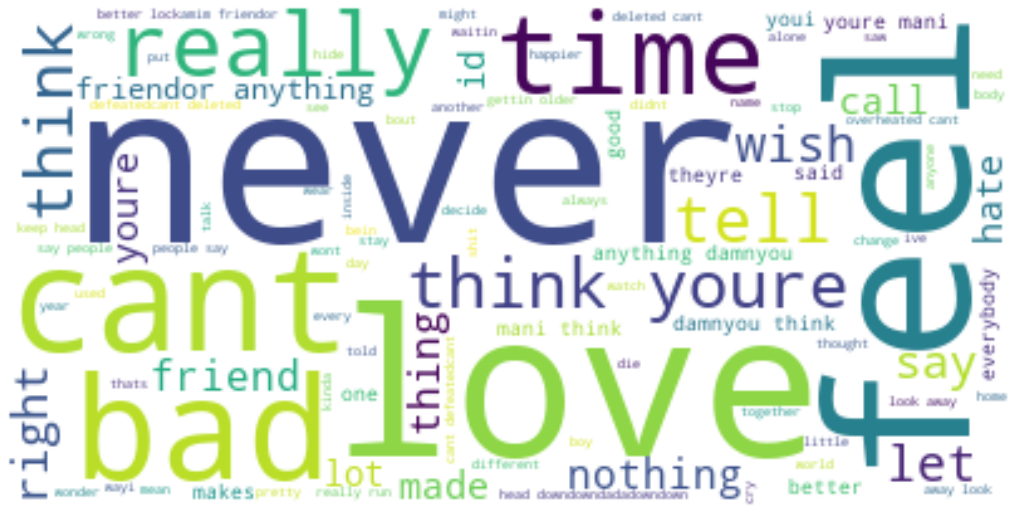

In [53]:
#Generate WordCloud
wc= WordCloud(background_color="white", max_font_size=90, stopwords=STOPWORDS)
wc.generate(text)

#Plot World Cloud
plt.figure(figsize = (18, 10))
#ic = ImageColorGenerator(mask)
plt.imshow(wc.recolor(), interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
from nltk.probability import FreqDist
words = word_tokenize(text)
fdist = FreqDist(words)
fdist.most_common(3)

[('think', 57), ('cant', 54), ('youre', 46)]

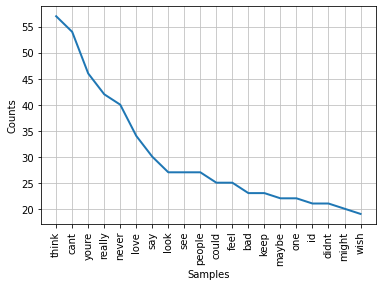

In [55]:
#Frequency Distribution
fdist.plot(20,cumulative=False)
plt.show()

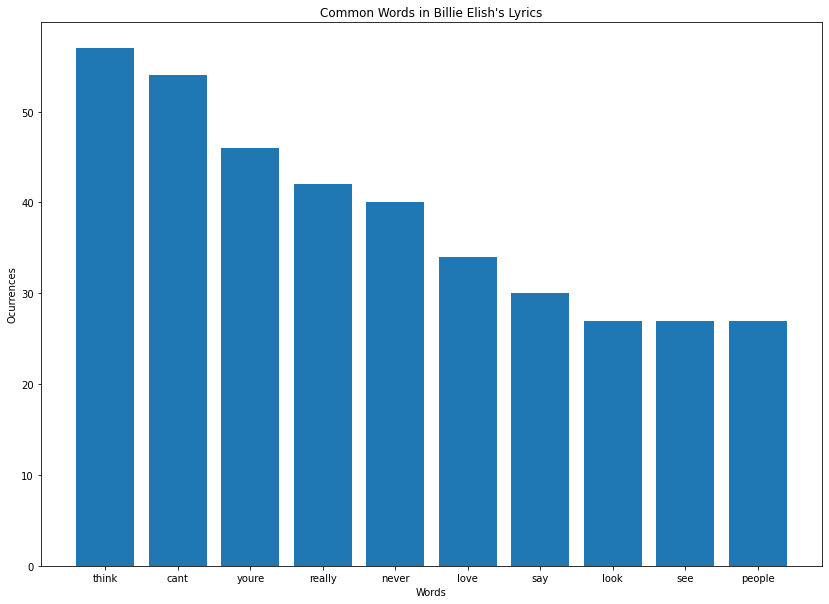

In [56]:
#Common Words Bar Graph
x , y = zip(*(fdist.most_common(10)))
plt.figure(figsize=(14, 10))
plt.bar(x, y)

plt.title("Common Words in Billie Elish's Lyrics")
plt.xlabel('Words')
plt.ylabel('Ocurrences')
plt.show()